In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.ar_model import AutoReg

# GET JSON OBJECT

In [3]:
# Opening JSON file
f = open('./response4.json') #cHANGE DIRECTORY TO YOUR DIRECTORY
 
# returns JSON object as 
# a dictionary
data = json.load(f)
 
# Iterating through the json
# list
for i in data['data']:
    print(i)
 
# Closing file
f.close()

67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb
eab5443a-b6a8-4369-893d-f03d2cbfc3bc
ac4aa561-03e4-4a19-a43a-b3cf10ac024a
46305cef-95f3-442b-9280-30535cd84125
d0c7cc5e-33ee-427a-8448-43fde52e381d


# Transform JSON into a DataFrame

In [5]:
# Create an empty list to store extracted data
formatted_data = []

# Iterate through the data and extract information with product_id
for product_id, entries in data['data'].items():
    for entry in entries:
        formatted_data.append({
            'date': pd.to_datetime(entry['date']).strftime('%Y-%m-%d'),
            'product_id': product_id,
            'qty_ordered': entry['qty_ordered']
        })

# Create a DataFrame from the formatted data
df = pd.DataFrame(formatted_data)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid date formats, if any
df = df.dropna(subset=['date'])

# Set 'date' as index
df.set_index('date', inplace=True)

# df = df.resample('D').sum()
# df = df.sort_index()
df = df.groupby([df.index, 'product_id']).sum()
df = df.reset_index(level='product_id')
df

,product_id,qty_ordered
date,,
2023-09-26,46305cef-95f3-442b-9280-30535cd84125,17
2023-09-26,67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb,21
2023-09-26,ac4aa561-03e4-4a19-a43a-b3cf10ac024a,86
2023-09-26,d0c7cc5e-33ee-427a-8448-43fde52e381d,17
2023-09-26,eab5443a-b6a8-4369-893d-f03d2cbfc3bc,111
...,...,...
2023-11-26,46305cef-95f3-442b-9280-30535cd84125,45
2023-11-26,67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb,111
2023-11-26,ac4aa561-03e4-4a19-a43a-b3cf10ac024a,23


# Create a Dataframe for EACH product_id

In [6]:
# Set each product to a dataframe
product_dfs = []
sales_prediction = {}


for each in pd.unique(df['product_id']):
    sales_prediction[each] = 0
    temp_df = df[df['product_id'] == each]
    product_dfs.append(temp_df)

len(product_dfs)

5

In [7]:
product_dfs

[                                      product_id  qty_ordered
 date                                                         
 2023-09-26  46305cef-95f3-442b-9280-30535cd84125           17
 2023-09-27  46305cef-95f3-442b-9280-30535cd84125           95
 2023-09-28  46305cef-95f3-442b-9280-30535cd84125           82
 2023-09-29  46305cef-95f3-442b-9280-30535cd84125           28
 2023-09-30  46305cef-95f3-442b-9280-30535cd84125           31
 ...                                          ...          ...
 2023-11-22  46305cef-95f3-442b-9280-30535cd84125           32
 2023-11-23  46305cef-95f3-442b-9280-30535cd84125          103
 2023-11-24  46305cef-95f3-442b-9280-30535cd84125            8
 2023-11-25  46305cef-95f3-442b-9280-30535cd84125           34
 2023-11-26  46305cef-95f3-442b-9280-30535cd84125           45
 
 [62 rows x 2 columns],
                                       product_id  qty_ordered
 date                                                         
 2023-09-26  67e3ccbc-1d7f-4a

In [6]:
# TESTING PUROPOSES ONLY
product_dfs[0] = product_dfs[0].resample('D').sum()
len(product_dfs[8])

C:\Users\Raymond\AppData\Local\Temp\ipykernel_20904\314270208.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_dfs[0] = product_dfs[0].resample('D').sum()


IndexError: list index out of range

# Model Implementation

In [9]:
# Implementing SES
temp_df = test[['qty_ordered']].copy()

ses_initialize = SimpleExpSmoothing(temp_df['qty_ordered'])
ses_model = ses_initialize.fit(optimized = True)

# Predict the next day's sales
forecast_next_day = ses_model.forecast(steps=1)
# Extract just the predicted value as a float
predicted_value = float(forecast_next_day.values[0])

print("Forecasted sales for the next day:", predicted_value)

NameError: name 'test' is not defined

# Simple Exponential Smoothing (SES)

In [8]:
for each in product_dfs:
    # Implementing SES
    if len(each) > 2:
        current_product = each['product_id'].iloc[0]
        print(current_product)
        temp_df = each[['qty_ordered']].copy()

        ses_initialize = SimpleExpSmoothing(temp_df['qty_ordered'])
        ses_model = ses_initialize.fit(optimized = True)

        # Predict the next day's sales
        forecast_next_day = ses_model.forecast(steps=1)

        # Extract just the predicted value as a int
        predicted_value = int(forecast_next_day.values[0])

        print("Forecasted sales for the next day:", predicted_value)
        sales_prediction[current_product] = predicted_value

sales_prediction
    

46305cef-95f3-442b-9280-30535cd84125
Forecasted sales for the next day: 53
67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb
Forecasted sales for the next day: 59
ac4aa561-03e4-4a19-a43a-b3cf10ac024a
Forecasted sales for the next day: 50
d0c7cc5e-33ee-427a-8448-43fde52e381d
Forecasted sales for the next day: 49
eab5443a-b6a8-4369-893d-f03d2cbfc3bc
Forecasted sales for the next day: 47


c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be use

{'46305cef-95f3-442b-9280-30535cd84125': 53,
 '67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb': 59,
 'ac4aa561-03e4-4a19-a43a-b3cf10ac024a': 50,
 'd0c7cc5e-33ee-427a-8448-43fde52e381d': 49,
 'eab5443a-b6a8-4369-893d-f03d2cbfc3bc': 47}

# Auto-Regression (AR) Implementation

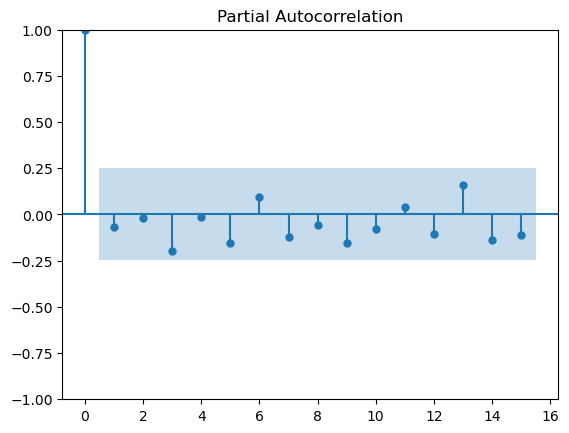

In [11]:
# PACF TESTING: TESTING PURPOSES ONLY
# product_dfs[0]['qty_ordered']
pacf_values=plot_pacf(product_dfs[0]['qty_ordered'], lags=15, alpha=0.05)

In [12]:
pacf, pvalues = sm.tsa.pacf(product_dfs[1]['qty_ordered'], nlags=10, alpha=0.05)
pacf

array([ 1.00000000e+00, -1.00758206e-01, -1.65436985e-01,  1.93536847e-01,
       -1.08327660e-01,  3.53274399e-02, -1.72927933e-01, -3.68983731e-04,
       -2.72243980e-01,  4.03197715e-02,  8.34200772e-02])

In [13]:
def get_lagged_value(arr):
    highest_positive = 0
    h_index = 0
    lowest_negative = 0
    l_index = 0
    
    lags = 0
    for i in range(1, len(arr)):
        if arr[i] > 0.25 and arr[i] > highest_positive:
            h_index = i
            highest_positive = arr[i] 
        elif arr[i] < -0.25 and arr[i] < lowest_negative:
            l_index = i 
            lowest_negative = arr[i] 
    
    if highest_positive == 0 and lowest_negative == 0:
        lags = 1
    elif lowest_negative == 0 and highest_positive != 0:
        lags = h_index
    elif highest_positive == 0 and lowest_negative != 0:
        lags = l_index
    elif highest_positive - 0.25 > ((lowest_negative - (-0.25)) * -1):
        lags = h_index
    elif highest_positive - 0.25 < ((lowest_negative - (-0.25)) * -1):
        lags = l_index
    else: 
        lags = 1
        
    return lags

# Example usage (assuming 'pacf' is defined elsewhere)
result = get_lagged_value(pacf)
print(result)

8


In [14]:
# AR TESTING: FOR TESTING PURPOSES ONLY
model = AutoReg(product_dfs[0]['qty_ordered'], lags=1).fit()
# Predict the next timestamp
prediction = model.predict(start=len(product_dfs[0]['qty_ordered']), end=len(product_dfs[0]['qty_ordered']), dynamic=False)

print("Predicted value for the next timestamp:", prediction)

Predicted value for the next timestamp: 2023-11-27    59.905175
Freq: D, dtype: float64


c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [15]:
for each in product_dfs:
    # AutoRegression Implementation
    if len(each) >= 10:
        current_product = each['product_id'].iloc[0]
        print(current_product)
        temp_df = each[['qty_ordered']].copy()
        
        #Get PACF
        pacf, pvalues = sm.tsa.pacf(temp_df['qty_ordered'], nlags=10, alpha=0.05)
        lags = get_lagged_value(pacf)
        autoreg_model = AutoReg(temp_df['qty_ordered'], lags=lags).fit()

        # Predict the next day's sales
        forecast_next_day = autoreg_model.predict(start=len(temp_df['qty_ordered']), end=len(temp_df['qty_ordered']), dynamic=False)

        # Extract just the predicted value as a int
        predicted_value = int(forecast_next_day.values[0])

        print("Forecasted sales for the next day:", predicted_value)
        sales_prediction[current_product] = predicted_value

sales_prediction
    

46305cef-95f3-442b-9280-30535cd84125
Forecasted sales for the next day: 59
67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb
Forecasted sales for the next day: 31
ac4aa561-03e4-4a19-a43a-b3cf10ac024a
Forecasted sales for the next day: 61
d0c7cc5e-33ee-427a-8448-43fde52e381d
Forecasted sales for the next day: 93
eab5443a-b6a8-4369-893d-f03d2cbfc3bc
Forecasted sales for the next day: 54


c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index

{'46305cef-95f3-442b-9280-30535cd84125': 59,
 '67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb': 31,
 'ac4aa561-03e4-4a19-a43a-b3cf10ac024a': 61,
 'd0c7cc5e-33ee-427a-8448-43fde52e381d': 93,
 'eab5443a-b6a8-4369-893d-f03d2cbfc3bc': 54}

# ARMA Implementation

In [16]:
for each in product_dfs:
    # ARMA Implementation
    if len(each) >= 10:
        current_product = each['product_id'].iloc[0]
        print(current_product)
        temp_df = each[['qty_ordered']].copy()
        
        #Get PACF for AR Component
        pacf, pvalues = sm.tsa.pacf(temp_df['qty_ordered'], nlags=10, alpha=0.05)
        ar_lags = get_lagged_value(pacf)
        
        #Get ACF for MA Component
        acf, pvalues = sm.tsa.acf(temp_df['qty_ordered'], nlags=10, alpha=0.05)
        ma_lags = get_lagged_value(acf)
        
        ARMA_model = sm.tsa.arima.ARIMA(temp_df['qty_ordered'], order=(ar_lags, 0, ma_lags)).fit()

        # Predict the next day's sales
        forecast_next_day = ARMA_model.predict(start=len(temp_df['qty_ordered']), end=len(temp_df['qty_ordered']))

        # Extract just the predicted value as a int
        predicted_value = int(forecast_next_day.values[0])

        print("Forecasted sales for the next day:", predicted_value)
        sales_prediction[current_product] = predicted_value

sales_prediction
    

46305cef-95f3-442b-9280-30535cd84125


c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting M

Forecasted sales for the next day: 69
67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb


c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecasted sales for the next day: 34
ac4aa561-03e4-4a19-a43a-b3cf10ac024a


c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting M

Forecasted sales for the next day: 61
d0c7cc5e-33ee-427a-8448-43fde52e381d


c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using 

Forecasted sales for the next day: 97
eab5443a-b6a8-4369-893d-f03d2cbfc3bc
Forecasted sales for the next day: 64


c:\Users\Raymond\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'46305cef-95f3-442b-9280-30535cd84125': 69,
 '67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb': 34,
 'ac4aa561-03e4-4a19-a43a-b3cf10ac024a': 61,
 'd0c7cc5e-33ee-427a-8448-43fde52e381d': 97,
 'eab5443a-b6a8-4369-893d-f03d2cbfc3bc': 64}

# ARIMA Implementation

In [305]:
for each in product_dfs:
    # ARMA Implementation
    if len(each) >= 10:
        current_product = each['product_id'].iloc[0]
        print(current_product)
        temp_df = each[['qty_ordered']].copy()
        
        #Get PACF for AR Component
        pacf, pvalues = sm.tsa.pacf(temp_df['qty_ordered'], nlags=10, alpha=0.05)
        ar_lags = get_lagged_value(pacf)
        
        #Get ACF for MA Component
        acf, pvalues = sm.tsa.acf(temp_df['qty_ordered'], nlags=10, alpha=0.05)
        ma_lags = get_lagged_value(acf)
        
        ARIMA_model = sm.tsa.arima.ARIMA(temp_df['qty_ordered'], order=(ar_lags, 1, ma_lags)).fit()

        # Predict the next day's sales
        forecast_next_day = ARIMA_model.predict(start=len(temp_df['qty_ordered']), end=len(temp_df['qty_ordered']))

        # Extract just the predicted value as a int
        predicted_value = int(forecast_next_day.values[0])

        print("Forecasted sales for the next day:", predicted_value)
        sales_prediction[current_product] = predicted_value

sales_prediction
    

46305cef-95f3-442b-9280-30535cd84125
Forecasted sales for the next day: 59
67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb


C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

Forecasted sales for the next day: 34
ac4aa561-03e4-4a19-a43a-b3cf10ac024a


C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

Forecasted sales for the next day: 59
d0c7cc5e-33ee-427a-8448-43fde52e381d


C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

Forecasted sales for the next day: 95
eab5443a-b6a8-4369-893d-f03d2cbfc3bc
Forecasted sales for the next day: 42


C:\Users\jerri\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'46305cef-95f3-442b-9280-30535cd84125': 59,
 '67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb': 34,
 'ac4aa561-03e4-4a19-a43a-b3cf10ac024a': 59,
 'd0c7cc5e-33ee-427a-8448-43fde52e381d': 95,
 'eab5443a-b6a8-4369-893d-f03d2cbfc3bc': 42}

# Simple Moving Average

In [17]:
# determine the number of days to use as moving value -> 7 days
# sort each product data by date (descending) and get the first 7 days in the list
def simple_moving_average(product_df):
    for each in product_df:
        # Simple Moving Average Implementation
        if len(each) >= 10:
            current_product = each['product_id'].iloc[0]
            print(current_product)
            temp_df = each[['qty_ordered']].copy()

            # Predict the next day's sales
            predicted_value = temp_df['qty_ordered'].rolling(window=7).mean().iloc[-1]

            # Extract just the predicted value as a int
            predicted_value = int(predicted_value)

            print("Forecasted sales for the next day:", predicted_value)
            sales_prediction[current_product] = predicted_value

In [18]:
simple_moving_average(product_dfs)

46305cef-95f3-442b-9280-30535cd84125
Forecasted sales for the next day: 54
67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb
Forecasted sales for the next day: 56
ac4aa561-03e4-4a19-a43a-b3cf10ac024a
Forecasted sales for the next day: 51
d0c7cc5e-33ee-427a-8448-43fde52e381d
Forecasted sales for the next day: 48
eab5443a-b6a8-4369-893d-f03d2cbfc3bc
Forecasted sales for the next day: 52


# Weighted Moving Average

In [19]:
for each in product_dfs:
    if len(each) >= 10:
        current_product = each['product_id'].iloc[0]
        print(current_product)
        temp_df = each[['qty_ordered']].copy()


        weighted_average_sum = 0
        for i in range(1,7):
            weighted_average_sum += (i * temp_df['qty_ordered'].iloc[-i])
        predicted_value = weighted_average_sum / 28 # [7(7+1)]/2

        predicted_value = int(predicted_value)

        print("Forecasted sales for the next day:", predicted_value)
        sales_prediction[current_product] = predicted_value

46305cef-95f3-442b-9280-30535cd84125
Forecasted sales for the next day: 35
67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb
Forecasted sales for the next day: 47
ac4aa561-03e4-4a19-a43a-b3cf10ac024a
Forecasted sales for the next day: 34
d0c7cc5e-33ee-427a-8448-43fde52e381d
Forecasted sales for the next day: 26
eab5443a-b6a8-4369-893d-f03d2cbfc3bc
Forecasted sales for the next day: 40


# Exponential Moving Average

In [20]:
for each in product_dfs:
    if len(each) >= 10:
        current_product = each['product_id'].iloc[0]
        print(current_product)
        temp_df = each[['qty_ordered']].copy()

        # seting the smoothing factor
        alpha = 0.2
        
        # getting the moving average, while adding the previous value to it
        predicted_value = temp_df['qty_ordered'].ewm(alpha=alpha, adjust=False).mean().iloc[-1]

        predicted_value = int(predicted_value)

        print("Forecasted sales for the next day:", predicted_value)
        sales_prediction[current_product] = predicted_value

46305cef-95f3-442b-9280-30535cd84125
Forecasted sales for the next day: 49
67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb
Forecasted sales for the next day: 62
ac4aa561-03e4-4a19-a43a-b3cf10ac024a
Forecasted sales for the next day: 49
d0c7cc5e-33ee-427a-8448-43fde52e381d
Forecasted sales for the next day: 49
eab5443a-b6a8-4369-893d-f03d2cbfc3bc
Forecasted sales for the next day: 52


# Triangular Moving Average

In [21]:
# taking the moving average of moving average data points

for each in product_dfs:
    if len(each) >= 10:
        current_product = each['product_id'].iloc[0]
        print(current_product)
        temp_df = each[['qty_ordered']].copy()

        # setting the window size for the moving average
        window_size = 7

        # get the simple moving average of the data
        temp_df['simple_ma'] = temp_df['qty_ordered'].rolling(window=window_size).mean()

        # get the moving average of each moving average
        predicted_value = temp_df['simple_ma'].rolling(window=window_size).mean().iloc[-1]

        predicted_value = int(predicted_value)

        print("Forecasted sales for the next day:", predicted_value)
        sales_prediction[current_product] = predicted_value


46305cef-95f3-442b-9280-30535cd84125
Forecasted sales for the next day: 62
67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb
Forecasted sales for the next day: 56
ac4aa561-03e4-4a19-a43a-b3cf10ac024a
Forecasted sales for the next day: 51
d0c7cc5e-33ee-427a-8448-43fde52e381d
Forecasted sales for the next day: 47
eab5443a-b6a8-4369-893d-f03d2cbfc3bc
Forecasted sales for the next day: 63


# Volatile Moving Average

special form of weighted MA where the weight is calculated with the standard deviation of percent change

In [29]:
for each in product_dfs:
    if len(each) >= 10:
        current_product = each['product_id'].iloc[0]
        print(current_product)
        temp_df = each[['qty_ordered']].copy()

        # set window and alpha values
        window_size = 7
        alpha = 0.2

        # calculate standard deviation
        purchase_std = temp_df['qty_ordered'].pct_change().rolling(window=window_size).std()

        # calculate and collect most recent weight
        weight = alpha / (1 + purchase_std).iloc[-1]

        # apply weight to moving average
        predicted_value = temp_df['qty_ordered'].ewm(alpha=weight, adjust=False).mean().iloc[-1]

        predicted_value = int(predicted_value)

        print("Forecasted sales for the next day:", predicted_value)
        sales_prediction[current_product] = predicted_value


46305cef-95f3-442b-9280-30535cd84125
Forecasted sales for the next day: 55
67e3ccbc-1d7f-4af6-85c7-ef5e878a7adb
Forecasted sales for the next day: 45
ac4aa561-03e4-4a19-a43a-b3cf10ac024a
Forecasted sales for the next day: 58
d0c7cc5e-33ee-427a-8448-43fde52e381d
Forecasted sales for the next day: 52
eab5443a-b6a8-4369-893d-f03d2cbfc3bc
Forecasted sales for the next day: 57
